In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.pyplot as plotter

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/content/Traffic.csv')
df = data.copy()
data.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


# Exploratory Data Analysis

In [4]:
df.shape

(5952, 9)

In [5]:
data.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000
mean,16.000000,65.440692,12.161458,12.912970,18.646337,109.161458
std,8.945023,44.749335,11.537944,12.497736,10.973139,55.996312
min,1.000000,5.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,18.750000,3.000000,2.000000,10.000000,54.000000
50%,16.000000,62.000000,9.000000,10.000000,18.000000,104.000000
75%,24.000000,103.000000,19.000000,20.000000,27.000000,153.000000
max,31.000000,180.000000,70.000000,50.000000,60.000000,279.000000


In [6]:
data.isnull().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

In [7]:
df.nunique()

Time                  96
Date                  31
Day of the week        7
CarCount             173
BikeCount             71
BusCount              51
TruckCount            59
Total                239
Traffic Situation      4
dtype: int64

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5952 entries, 0 to 5951
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               5952 non-null   object
 1   Date               5952 non-null   int64 
 2   Day of the week    5952 non-null   object
 3   CarCount           5952 non-null   int64 
 4   BikeCount          5952 non-null   int64 
 5   BusCount           5952 non-null   int64 
 6   TruckCount         5952 non-null   int64 
 7   Total              5952 non-null   int64 
 8   Traffic Situation  5952 non-null   object
dtypes: int64(6), object(3)
memory usage: 418.6+ KB


In [10]:
desc = pd.DataFrame(round((df.describe().T), 2))
desc

,count,mean,std,min,25%,50%,75%,max
Date,5952.0,16.00,8.95,1.0,8.00,16.0,24.0,31.0
CarCount,5952.0,65.44,44.75,5.0,18.75,62.0,103.0,180.0
BikeCount,5952.0,12.16,11.54,0.0,3.00,9.0,19.0,70.0
BusCount,5952.0,12.91,12.50,0.0,2.00,10.0,20.0,50.0
TruckCount,5952.0,18.65,10.97,0.0,10.00,18.0,27.0,60.0
Total,5952.0,109.16,56.00,21.0,54.00,104.0,153.0,279.0


# Data Visualization

<Axes: xlabel='Time', ylabel='Count'>

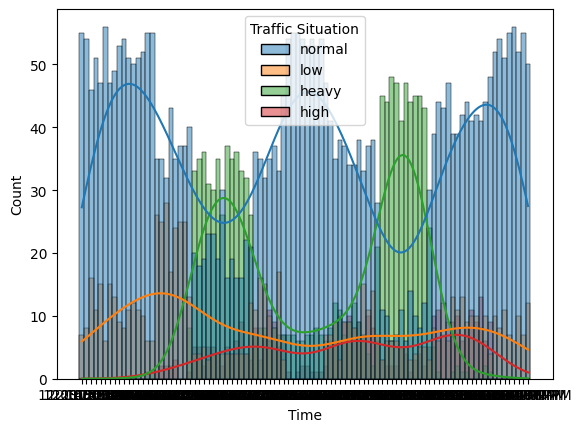

In [11]:
sns.histplot(data,x='Time',hue='Traffic Situation',kde=True)

<Axes: xlabel='Date', ylabel='Count'>

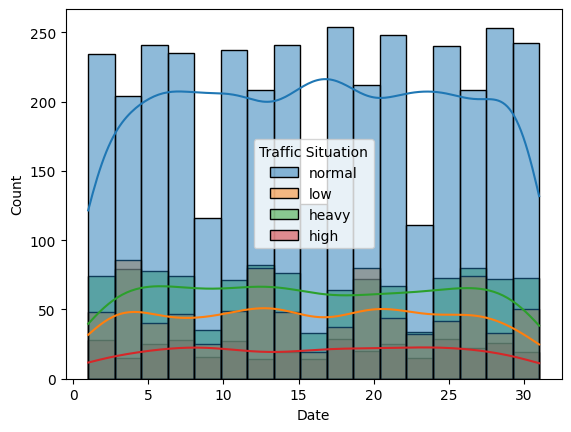

In [12]:
sns.histplot(data,x='Date',hue='Traffic Situation',kde=True)

<Axes: xlabel='Day of the week', ylabel='Count'>

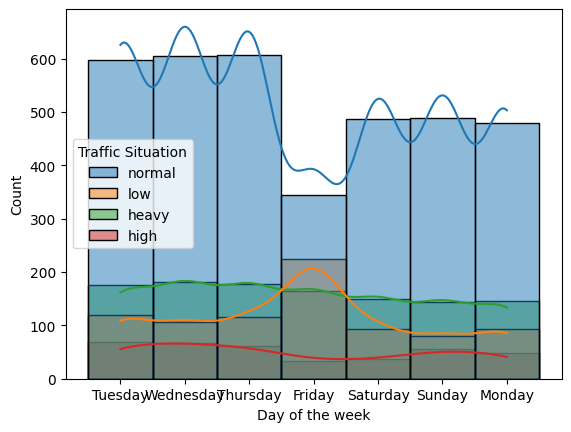

In [13]:
sns.histplot(data,x='Day of the week',hue='Traffic Situation',kde=True)

<Axes: xlabel='CarCount', ylabel='Count'>

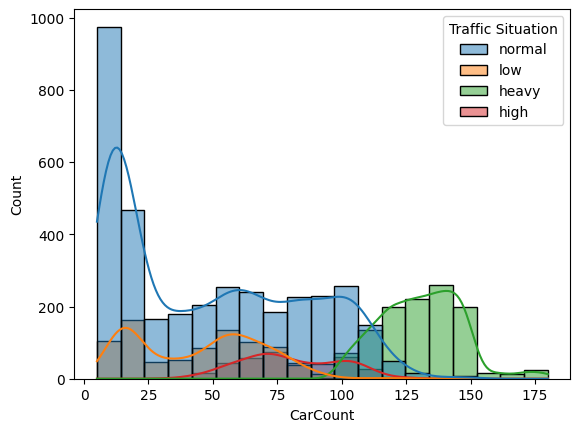

In [14]:
sns.histplot(data,x='CarCount',hue='Traffic Situation',kde=True)

<Axes: xlabel='BikeCount', ylabel='Count'>

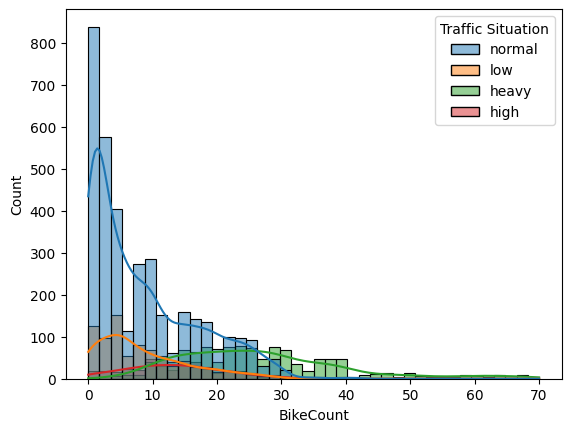

In [15]:
sns.histplot(data,x='BikeCount',hue='Traffic Situation',kde=True)

<Axes: xlabel='BusCount', ylabel='Count'>

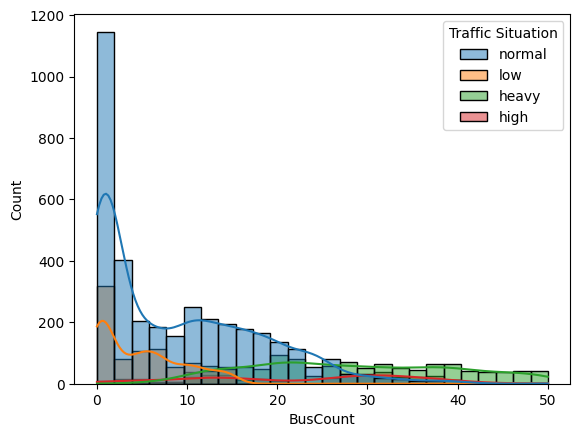

In [16]:
sns.histplot(data,x='BusCount',hue='Traffic Situation',kde=True)

<Axes: xlabel='TruckCount', ylabel='Count'>

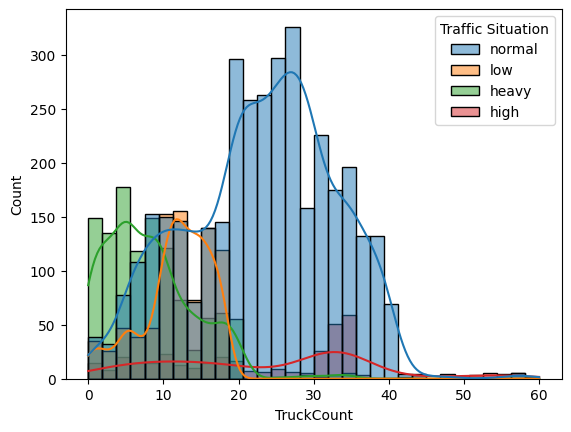

In [17]:
sns.histplot(data,x='TruckCount',hue='Traffic Situation',kde=True)

<Axes: xlabel='Total', ylabel='Count'>

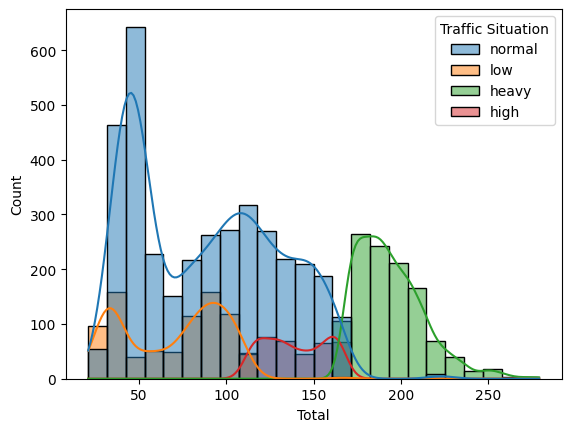

In [18]:
sns.histplot(data,x='Total',hue='Traffic Situation',kde=True)


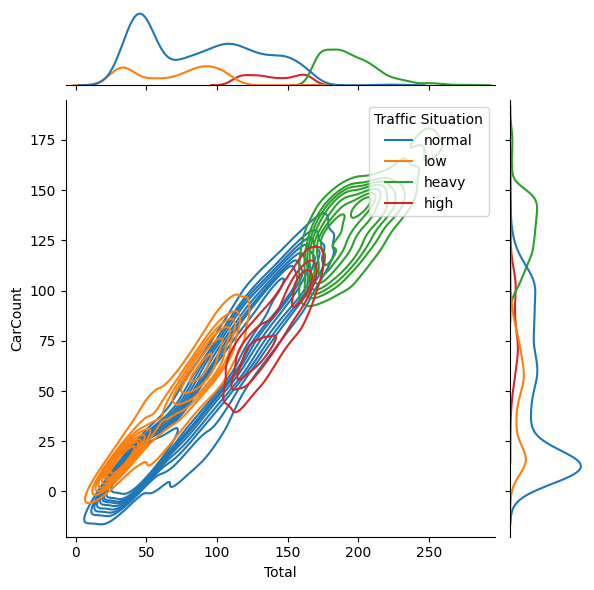

In [19]:
sns.jointplot(data=data, x="Total", y="CarCount", hue="Traffic Situation", kind="kde")


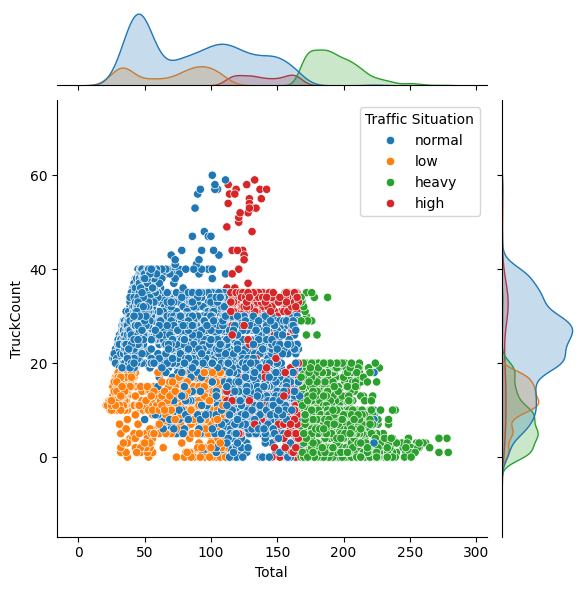

In [20]:
sns.jointplot(data=data, x="Total", y="TruckCount",
              hue="Traffic Situation")

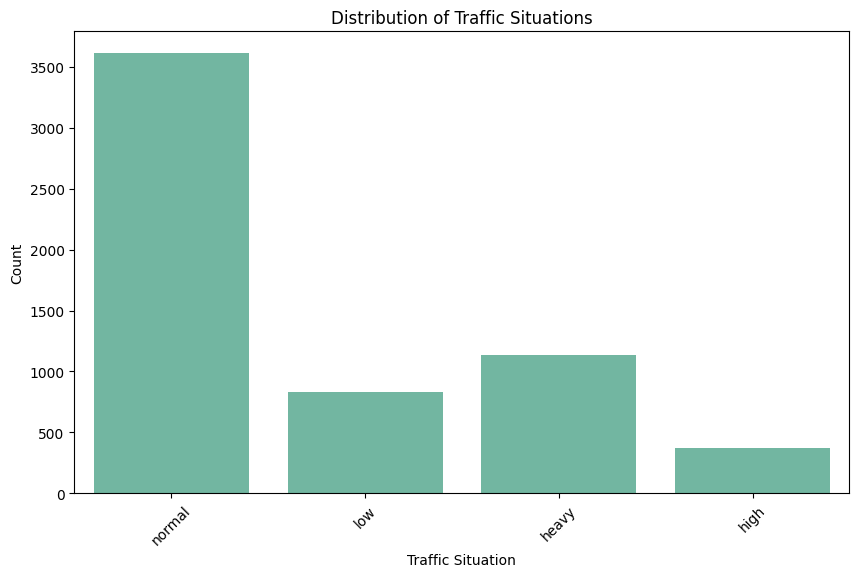

In [21]:
plt.figure(figsize=(10,6))
sns.set_palette("Set2")
sns.countplot(x='Traffic Situation', data=data)
plt.xlabel('Traffic Situation')
plt.ylabel('Count')
plt.title('Distribution of Traffic Situations')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [22]:
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df["Day of the week"] = pd.Categorical(df["Day of the week"], categories=days_order, ordered=True)
df = df.sort_values(by="Day of the week")
summary = df.groupby("Day of the week")[["CarCount", "BikeCount", "BusCount", "TruckCount"]].sum().reset_index()

In [23]:
summary.set_index("Day of the week", inplace=True)
summary

,CarCount,BikeCount,BusCount,TruckCount
Day of the week,,,,
Monday,49724,8633,10652,14567
Tuesday,63014,10885,13106,17877
Wednesday,63456,11079,13223,18070
Thursday,62779,10978,13460,17857
Friday,49890,12947,5297,13492
Saturday,50457,9105,10508,14472
Sunday,50183,8758,10612,14648


<Figure size 1000x600 with 0 Axes>

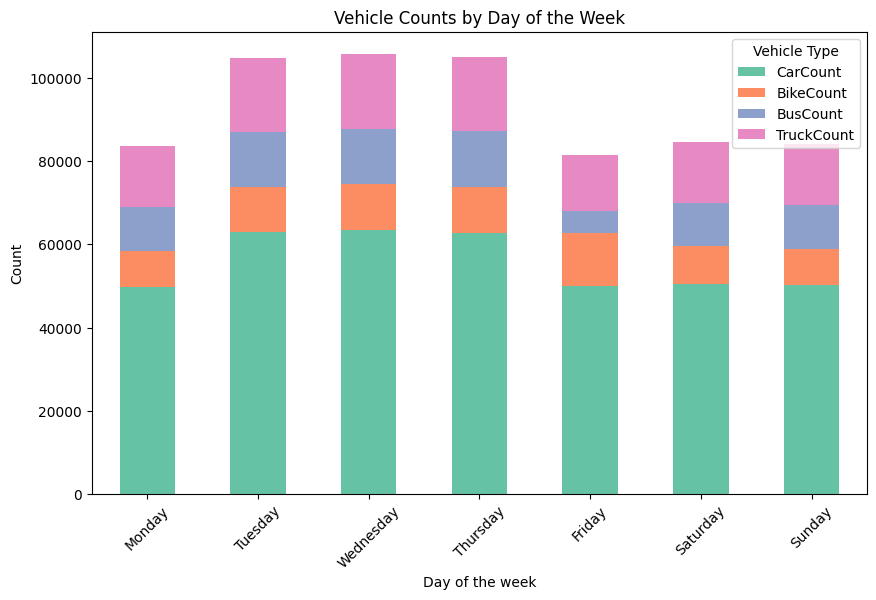

In [24]:
plt.figure(figsize=(10,6))
ax = summary.plot(kind="bar", stacked=True, figsize=(10, 6))
ax.set_xlabel("Day of the week")
ax.set_ylabel("Count")
ax.set_title("Vehicle Counts by Day of the Week")
ax.legend(title="Vehicle Type")
plt.xticks(rotation=45)
plt.show()

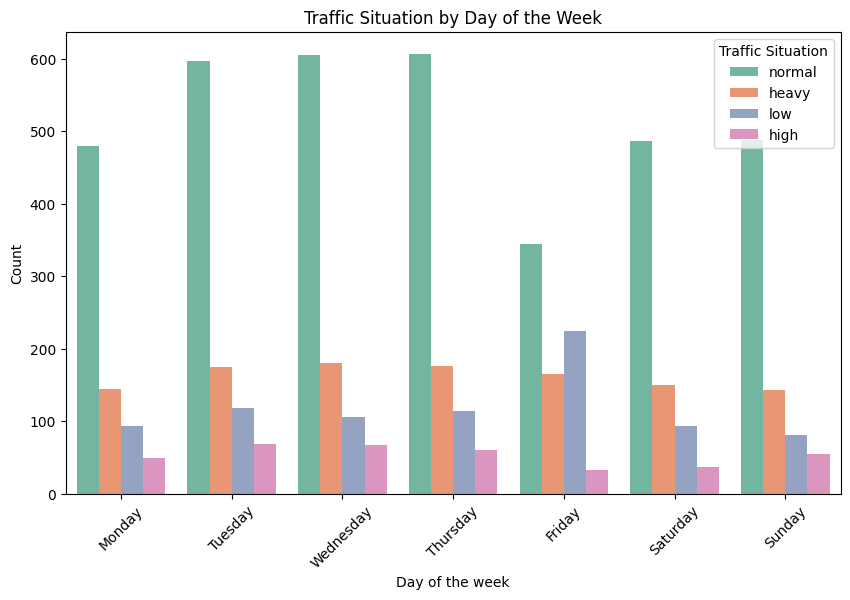

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Day of the week", hue="Traffic Situation", palette="Set2")
plt.xlabel("Day of the week")
plt.ylabel("Count")
plt.title("Traffic Situation by Day of the Week")
plt.legend(title="Traffic Situation")
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

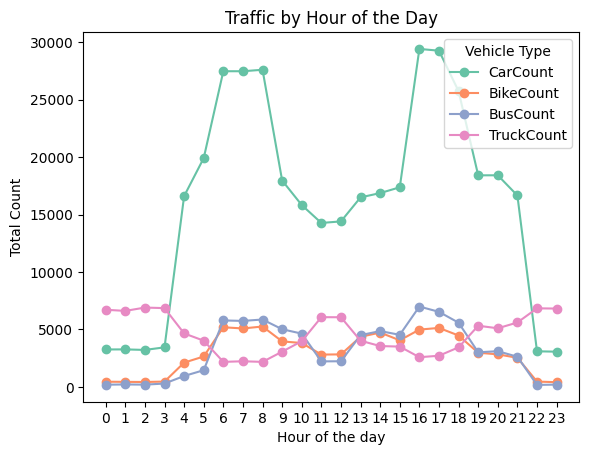

In [26]:
# Extract the hour from the "Time" column
df["Hour"] = pd.to_datetime(df["Time"]).dt.hour

# Group the data by hour and sum the counts
hourly_traffic = df.groupby("Hour")[["CarCount", "BikeCount", "BusCount", "TruckCount"]].sum()

# Plotting
plt.figure(figsize=(10,6))
hourly_traffic.plot(kind="line", marker="o")
plt.xlabel("Hour of the day")
plt.ylabel("Total Count")
plt.title("Traffic by Hour of the Day")
plt.legend(title="Vehicle Type",loc="upper right")
plt.xticks(range(24))
plt.show()

# Data Preprocessing

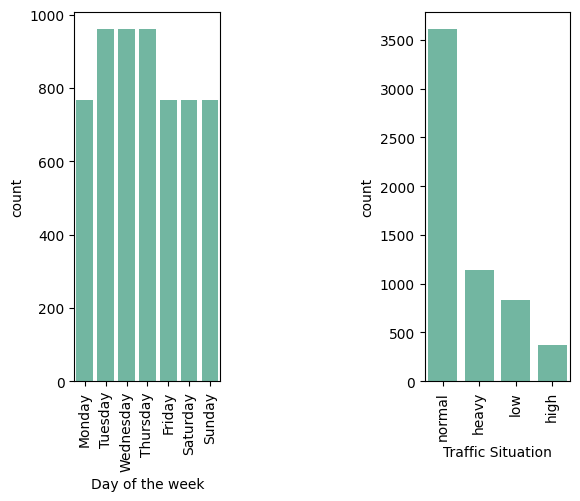

In [27]:
plt.subplot(1, 3, 1)
sns.countplot(x = df["Day of the week"])
plotter.xticks(rotation = 90);

plt.subplot(1, 3, 3)
sns.countplot(x = df["Traffic Situation"])
plotter.xticks(rotation = 90);
plt.show()

In [28]:
df_temp=df
df_temp['Day of the week'] = df_temp['Day of the week'].replace({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday': 6,'Sunday':7})
df_temp['Traffic Situation'] = df_temp['Traffic Situation'].replace({'low': 0,'normal': 1,'high': 2, 'heavy':3})
df=df_temp
df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Hour
4991,11:45:00 PM,30,1,19,0,0,29,48,1,23
5635,4:45:00 PM,6,1,135,29,39,7,210,3,16
5634,4:30:00 PM,6,1,124,24,47,9,204,3,16
5633,4:15:00 PM,6,1,109,12,49,6,176,3,16
5632,4:00:00 PM,6,1,139,25,41,5,210,3,16
...,...,...,...,...,...,...,...,...,...,...
4124,11:00:00 PM,21,7,20,4,1,26,51,1,23
4123,10:45:00 PM,21,7,19,2,1,34,56,1,22
4122,10:30:00 PM,21,7,18,5,1,13,37,0,22
1914,10:30:00 PM,29,7,8,2,1,28,39,1,22


# Feature Engineering

In [29]:
df.columns

Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation', 'Hour'],
      dtype='object')

In [30]:
# Distinct Classes in Target variable
df['Traffic Situation'].value_counts()

1    3610
3    1137
0     834
2     371
Name: Traffic Situation, dtype: int64

In [31]:
#Dealing with 'Day of the week' feature
data['Day of the week'].value_counts()

Tuesday      960
Wednesday    960
Thursday     960
Friday       768
Saturday     768
Sunday       768
Monday       768
Name: Day of the week, dtype: int64

In [32]:
test_temp = df.copy()

In [33]:
df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Hour
4991,11:45:00 PM,30,1,19,0,0,29,48,1,23
5635,4:45:00 PM,6,1,135,29,39,7,210,3,16
5634,4:30:00 PM,6,1,124,24,47,9,204,3,16
5633,4:15:00 PM,6,1,109,12,49,6,176,3,16
5632,4:00:00 PM,6,1,139,25,41,5,210,3,16
...,...,...,...,...,...,...,...,...,...,...
4124,11:00:00 PM,21,7,20,4,1,26,51,1,23
4123,10:45:00 PM,21,7,19,2,1,34,56,1,22
4122,10:30:00 PM,21,7,18,5,1,13,37,0,22
1914,10:30:00 PM,29,7,8,2,1,28,39,1,22


In [34]:
#Extracting Specific time-related information from 'Time(24:00 am/pm)' column

df['hour'] = pd.to_datetime(df['Time']).dt.hour #Hour in separate column
df['minute'] = pd.to_datetime(df['Time']).dt.minute #Minute in separate column


# replace 0 with AM
# replace 1 with PM

df['Temp'] = df['Time'].apply(lambda x: x.split(' ')[1]) #Temporary column for AM/PM
df['AM/PM'] = df['Temp'].replace({'AM':0,'PM':1})

In [35]:
df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Hour,hour,minute,Temp,AM/PM
4991,11:45:00 PM,30,1,19,0,0,29,48,1,23,23,45,PM,1
5635,4:45:00 PM,6,1,135,29,39,7,210,3,16,16,45,PM,1
5634,4:30:00 PM,6,1,124,24,47,9,204,3,16,16,30,PM,1
5633,4:15:00 PM,6,1,109,12,49,6,176,3,16,16,15,PM,1
5632,4:00:00 PM,6,1,139,25,41,5,210,3,16,16,0,PM,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4124,11:00:00 PM,21,7,20,4,1,26,51,1,23,23,0,PM,1
4123,10:45:00 PM,21,7,19,2,1,34,56,1,22,22,45,PM,1
4122,10:30:00 PM,21,7,18,5,1,13,37,0,22,22,30,PM,1
1914,10:30:00 PM,29,7,8,2,1,28,39,1,22,22,30,PM,1


In [36]:
#Now remove 'Temp' and 'Time' columns
df= df.drop(columns = ['Time','Temp'], axis=1)
df

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Hour,hour,minute,AM/PM
4991,30,1,19,0,0,29,48,1,23,23,45,1
5635,6,1,135,29,39,7,210,3,16,16,45,1
5634,6,1,124,24,47,9,204,3,16,16,30,1
5633,6,1,109,12,49,6,176,3,16,16,15,1
5632,6,1,139,25,41,5,210,3,16,16,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4124,21,7,20,4,1,26,51,1,23,23,0,1
4123,21,7,19,2,1,34,56,1,22,22,45,1
4122,21,7,18,5,1,13,37,0,22,22,30,1
1914,29,7,8,2,1,28,39,1,22,22,30,1


# Correlation using Heat Map

In [37]:
df[['Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'hour', 'minute', 'AM/PM', 'Traffic Situation']].corr()


,Date,CarCount,BikeCount,BusCount,TruckCount,Total,hour,minute,AM/PM,Traffic Situation
Date,1.000000e+00,-0.010331,0.000606,-0.003638,0.020669,-0.004893,3.752164e-16,-8.795831e-17,8.552063e-17,-0.000985
CarCount,-1.033127e-02,1.000000,0.708243,0.658417,-0.615043,0.971507,1.538399e-01,-4.548948e-03,1.085476e-01,0.688065
BikeCount,6.056798e-04,0.708243,1.000000,0.577671,-0.607720,0.781879,1.179204e-01,1.009466e-03,1.036435e-01,0.568472
BusCount,-3.637580e-03,0.658417,0.577671,1.000000,-0.558372,0.758970,1.816036e-01,-1.806164e-02,1.585635e-01,0.661320
TruckCount,2.066869e-02,-0.615043,-0.607720,-0.558372,1.000000,-0.545390,-2.657474e-02,9.183040e-03,1.577175e-03,-0.265776
Total,-4.893004e-03,0.971507,0.781879,0.758970,-0.545390,1.000000,1.825624e-01,-5.658909e-03,1.437998e-01,0.762516
hour,3.752164e-16,0.153840,0.117920,0.181604,-0.026575,0.182562,1.000000e+00,4.335491e-17,8.667781e-01,0.097942
minute,-8.795831e-17,-0.004549,0.001009,-0.018062,0.009183,-0.005659,4.335491e-17,1.000000e+00,4.658978e-17,-0.007796
AM/PM,8.552063e-17,0.108548,0.103644,0.158564,0.001577,0.143800,8.667781e-01,4.658978e-17,1.000000e+00,0.087881
Traffic Situation,-9.845451e-04,0.688065,0.568472,0.661320,-0.265776,0.762516,9.794235e-02,-7.795990e-03,8.788068e-02,1.000000


<Axes: >

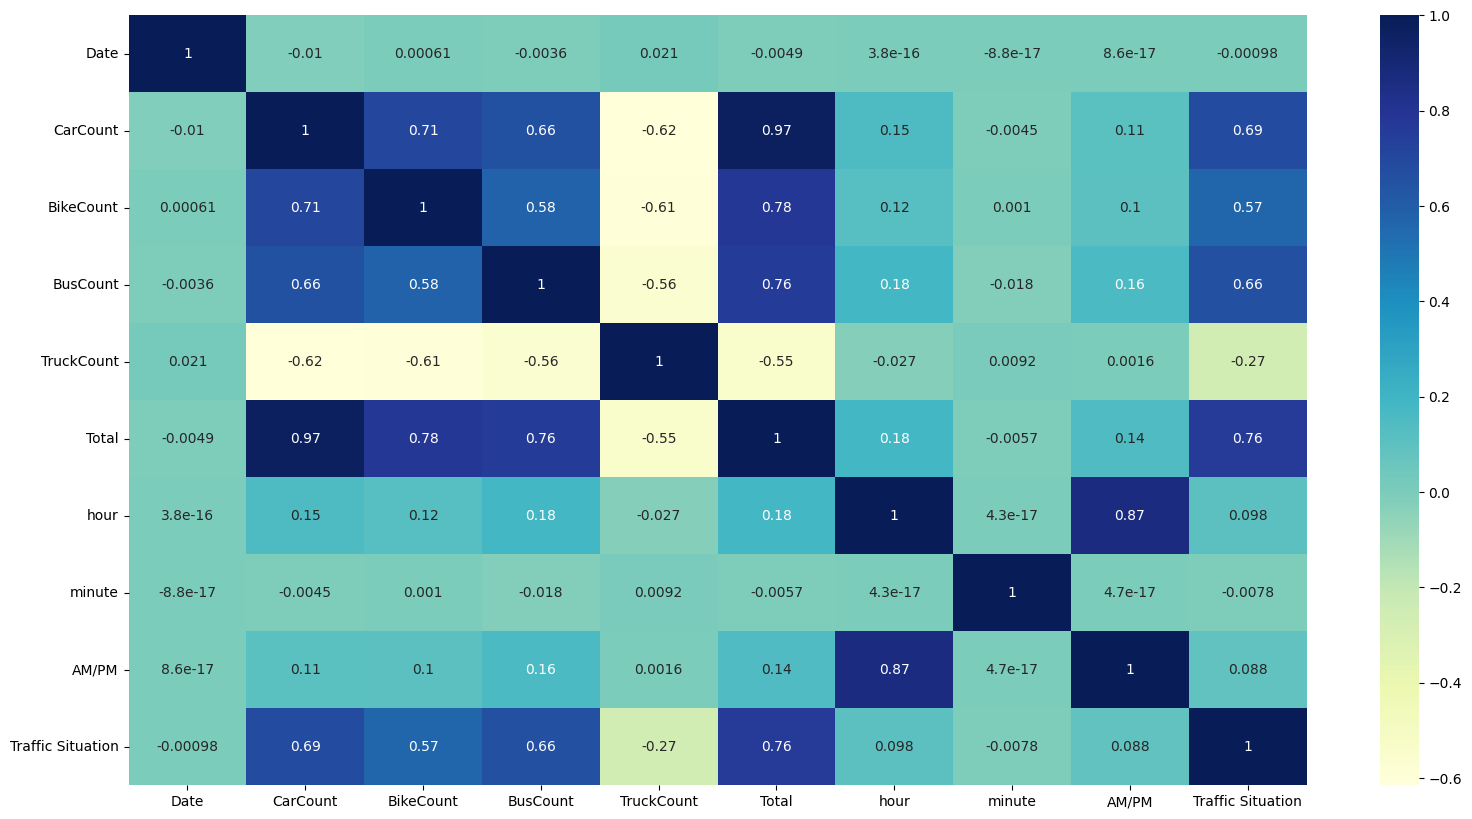

In [38]:
plt.figure(figsize = (19,10))
sns.heatmap(df[['Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
           'TruckCount', 'Total', 'hour', 'minute', 'AM/PM', 'Traffic Situation']].corr(),
            cmap="YlGnBu",annot=True)

# Data Spliting

In [39]:
df.columns

Index(['Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation', 'Hour', 'hour', 'minute',
       'AM/PM'],
      dtype='object')

In [40]:
X= df[['Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total','hour', 'minute', 'AM/PM']]

y= df['Traffic Situation'].values

In [41]:
X.head()

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,hour,minute,AM/PM
4991,30,1,19,0,0,29,48,23,45,1
5635,6,1,135,29,39,7,210,16,45,1
5634,6,1,124,24,47,9,204,16,30,1
5633,6,1,109,12,49,6,176,16,15,1
5632,6,1,139,25,41,5,210,16,0,1


In [44]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2 , random_state = 0)

# Feature Scaling

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)

In [46]:
train_X

array([[ 0.11566747, -0.97313434,  1.63001746, ...,  0.94931336,
        -0.45793443,  1.00949689],
       [-0.8921071 , -0.45988602, -0.64456341, ..., -0.0603811 ,
        -1.35293681, -0.99059245],
       [ 0.00369252, -1.48638267,  1.40701934, ..., -0.4931073 ,
        -1.35293681, -0.99059245],
       ...,
       [ 0.11566747, -0.97313434,  0.38122796, ..., -1.07007557,
        -0.45793443, -0.99059245],
       [-0.8921071 , -0.45988602,  0.9833229 , ..., -0.9258335 ,
         0.43706796, -0.99059245],
       [-0.78013215,  0.0533623 ,  0.55962646, ..., -0.9258335 ,
         1.33207034, -0.99059245]])

In [47]:
test_X

array([[-1.11605701, -1.48638267, -1.17975891, ..., -1.21431764,
         1.33207034, -0.99059245],
       [-0.6681572 , -0.97313434,  0.2697289 , ..., -1.07007557,
         1.33207034, -0.99059245],
       [ 1.57134185, -1.48638267, -0.86756153, ..., -0.0603811 ,
        -1.35293681, -0.99059245],
       ...,
       [ 1.23541699,  0.56661062, -0.95676078, ...,  1.09355543,
         1.33207034,  1.00949689],
       [-0.44420729,  0.0533623 ,  1.40701934, ...,  0.66082923,
        -1.35293681,  1.00949689],
       [ 1.4593669 ,  1.59310727, -0.24316679, ..., -1.07007557,
        -1.35293681, -0.99059245]])

# Logistic Regression

In [48]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='ovr')
classifier.fit(train_X, train_y)

LogisticRegression(multi_class='ovr', random_state=0)

In [49]:
# Evaluate the model
y_predlog = classifier.predict(test_X)
accuracy = accuracy_score(test_y, y_predlog)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 86.15%


# Confusion Matrix

In [50]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(test_y, y_predlog)
cm

array([[ 95,  59,   0,   0],
       [ 20, 689,   0,   5],
       [  0,  71,   0,   7],
       [  0,   3,   0, 242]])

# Random Forest

In [51]:

# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 10,criterion="entropy")

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(train_X, train_y)

# performing predictions on the test dataset
y_pred = clf.predict(test_X)

# metrics are used to find accuracy or error
from sklearn import metrics
print()

# using metrics module for accuracy calculation

accuracy = accuracy_score(test_y, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 99.92%


# Confusion Matrix

In [52]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(test_y, y_pred)
cm

array([[154,   0,   0,   0],
       [  0, 713,   0,   1],
       [  0,   0,  78,   0],
       [  0,   0,   0, 245]])

# Support Vector Classifier

In [53]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [54]:
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(train_X, train_y)
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(train_X, train_y)

In [55]:
poly_pred = poly.predict(test_X)
rbf_pred = rbf.predict(test_X)

In [56]:
poly_accuracy = accuracy_score(test_y, poly_pred)
poly_f1 = f1_score(test_y, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Polynomial Kernel):  89.08
F1 (Polynomial Kernel):  88.24


In [57]:

rbf_accuracy = accuracy_score(test_y, rbf_pred)
rbf_f1 = f1_score(test_y, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (RBF Kernel):  83.46
F1 (RBF Kernel):  79.48


# Confusion Matrix

In [58]:
#Creating the Confusion matrix for polynomial kernel
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(test_y, poly_pred)
cm

array([[100,  54,   0,   0],
       [  8, 700,   3,   3],
       [  0,  37,  34,   7],
       [  0,  14,   4, 227]])

In [59]:
#Creating the Confusion matrix for rbf kernel
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(test_y, rbf_pred)
cm

array([[ 65,  89,   0,   0],
       [  0, 711,   0,   3],
       [  0,  65,   0,  13],
       [  0,  27,   0, 218]])

# Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree

treemodel = DecisionTreeClassifier()
treemodel.fit(train_X, train_y)

DecisionTreeClassifier()

Accuracy: 99.92%
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       153
           1       1.00      1.00      1.00       715
           2       1.00      1.00      1.00        78
           3       1.00      1.00      1.00       245

    accuracy                           1.00      1191
   macro avg       1.00      1.00      1.00      1191
weighted avg       1.00      1.00      1.00      1191



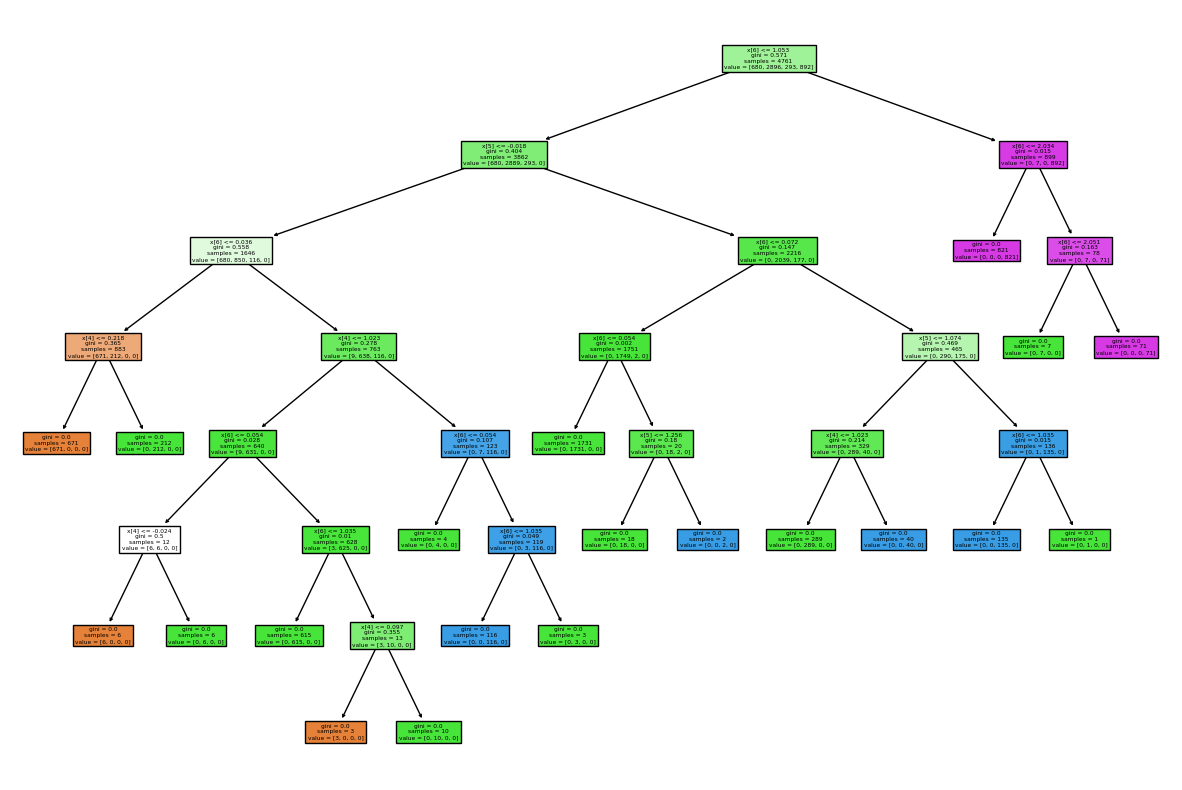

In [61]:
plt.figure(figsize=(15, 10))
tree.plot_tree(treemodel, filled=True)
ypred = treemodel.predict(test_X)
score = accuracy_score(ypred, test_y)
print("Accuracy: {:.2f}%".format(score * 100))
print(classification_report(ypred, test_y))

# Confusion Matrix

In [62]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ypred, test_y)
cm

array([[153,   0,   0,   0],
       [  1, 714,   0,   0],
       [  0,   0,  78,   0],
       [  0,   0,   0, 245]])

# K Nearest Neighbour Model

In [63]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

In [64]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(train_X, train_y)
Y_pred = knn.predict(test_X)
accuracy_knn=round(accuracy_score(test_y,Y_pred)* 100, 2)
acc_knn = round(knn.score(train_X, train_y) * 100, 2)

cm = confusion_matrix(test_y, Y_pred)
accuracy = accuracy_score(test_y,Y_pred)
precision =precision_score(test_y, Y_pred,average='micro')
recall =  recall_score(test_y, Y_pred,average='micro')
f1 = f1_score(test_y,Y_pred,average='micro')

print('Confusion matrix for KNN\n',cm)
print('accuracy_KNN : %.3f' %accuracy_knn)
print('precision_KNN : %.3f' %precision)
print('recall_KNN: %.3f' %recall)
print('f1-score_KNN : %.3f' %f1)

Confusion matrix for KNN
 [[120  34   0   0]
 [ 14 683   4  13]
 [  0  35  32  11]
 [  0  12   4 229]]
accuracy_KNN : 89.340
precision_KNN : 0.893
recall_KNN: 0.893
f1-score_KNN : 0.893


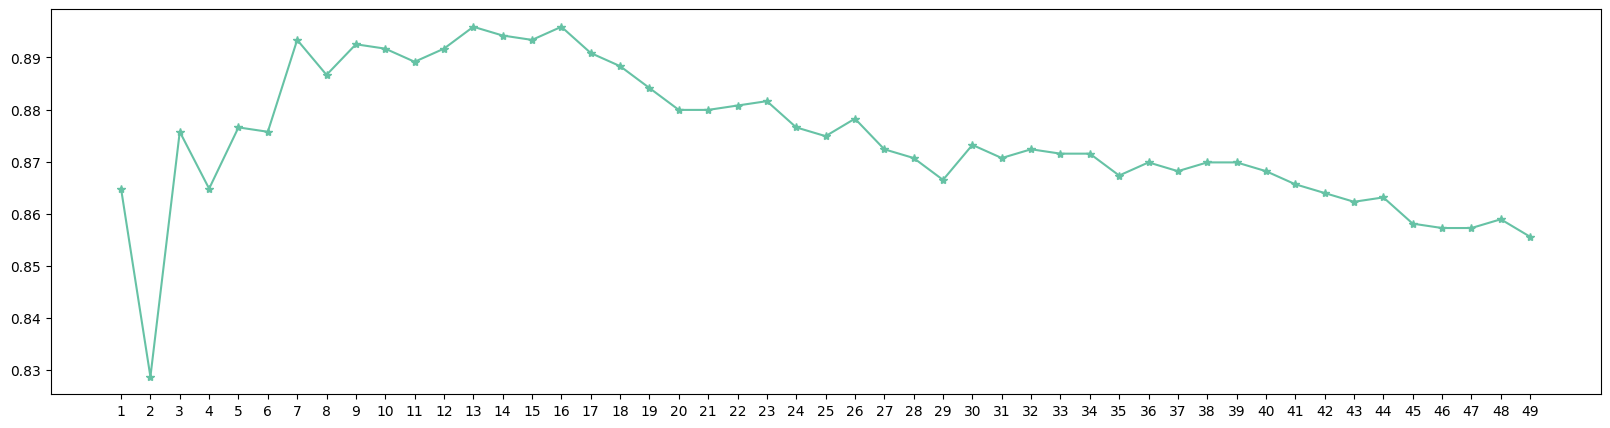

In [65]:
plt.subplots(figsize=(20,5))
a_index=list(range(1,50))
a=pd.Series()
x=range(1,50)
#x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,50)):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(accuracy_score(test_y,prediction)))
plt.plot(a_index, a,marker="*")
plt.xticks(x)
plt.show()

# Naive Bayes Classifier

In [66]:
from sklearn.naive_bayes import GaussianNB

In [67]:
gaussian = GaussianNB()
gaussian.fit(train_X, train_y)
Y_pred = gaussian.predict(test_X)
accuracy_nb=round(accuracy_score(test_y,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(train_X, train_y) * 100, 2)

cm = confusion_matrix(test_y, Y_pred)
accuracy = accuracy_score(test_y,Y_pred)
precision =precision_score(test_y, Y_pred,average='micro')
recall =  recall_score(test_y, Y_pred,average='micro')
f1 = f1_score(test_y,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy_nb)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[100  53   1   0]
 [  2 585  97  30]
 [  0  21  48   9]
 [  0   0   2 243]]
accuracy_Naive Bayes: 81.950
precision_Naive Bayes: 0.819
recall_Naive Bayes: 0.819
f1-score_Naive Bayes : 0.819


# Multi Layer Perceptron

In [68]:
from sklearn.neural_network import MLPClassifier

# Creating (MLP) classifier
clf = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000,
                    random_state=42)

In [69]:

# Training the model
clf.fit(train_X, train_y)
# Making prediction
y_pred = clf.predict(test_X)

In [70]:
# Determining Accuracy
accuracy = accuracy_score(test_y, y_pred)
print(f"Accuracy: {accuracy*100:.2f}")

Accuracy: 97.57


# Confusion Matrix

In [71]:
cm = confusion_matrix(test_y, y_pred)
cm

array([[147,   7,   0,   0],
       [  2, 704,   5,   3],
       [  0,   7,  70,   1],
       [  0,   3,   1, 241]])

# Artificial Neural Network


In [72]:
# One-hot encode the labels
from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

In [73]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_onehot, test_size=0.2, random_state=42)

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [76]:
import tensorflow as tf
from tensorflow import keras


model = Sequential()
model.add(Dense(10, input_shape=(10,), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(4, activation='softmax'))

# opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=10, epochs=50, verbose=1)



Epoch 1/50
477/477 [==============================] - 2s 2ms/step - loss: 0.8828 - accuracy: 0.6415
Epoch 2/50
477/477 [==============================] - 1s 2ms/step - loss: 0.4507 - accuracy: 0.8315
Epoch 3/50
477/477 [==============================] - 1s 2ms/step - loss: 0.3315 - accuracy: 0.8754
Epoch 4/50
477/477 [==============================] - 1s 2ms/step - loss: 0.2825 - accuracy: 0.8994
Epoch 5/50
477/477 [==============================] - 1s 2ms/step - loss: 0.2557 - accuracy: 0.9063
Epoch 6/50
477/477 [==============================] - 1s 2ms/step - loss: 0.2367 - accuracy: 0.9072
Epoch 7/50
477/477 [==============================] - 1s 2ms/step - loss: 0.2252 - accuracy: 0.9147
Epoch 8/50
477/477 [==============================] - 1s 2ms/step - loss: 0.2129 - accuracy: 0.9206
Epoch 9/50
477/477 [==============================] - 1s 2ms/step - loss: 0.2032 - accuracy: 0.9238
Epoch 10/50
477/477 [==============================] - 1s 2ms/step - loss: 0.1926 - accuracy: 0.9303

In [77]:
# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {accuracy * 100:.2f}%')

Test accuracy: 96.89%


# CNN Model

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [79]:
X_reshaped = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# One-hot encode the labels
encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_onehot, test_size=0.2, random_state=42)

In [80]:
# Create a Sequential model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(10, 1)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with validation split
history = model.fit(X_train, y_train, batch_size=10, epochs=100, verbose=1, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on the testing set

Epoch 1/100
381/381 [==============================] - 3s 4ms/step - loss: 0.5639 - accuracy: 0.8041 - val_loss: 0.2965 - val_accuracy: 0.8993
Epoch 2/100
381/381 [==============================] - 1s 2ms/step - loss: 0.2512 - accuracy: 0.9091 - val_loss: 0.2491 - val_accuracy: 0.9003
Epoch 3/100
381/381 [==============================] - 1s 2ms/step - loss: 0.2018 - accuracy: 0.9241 - val_loss: 0.1989 - val_accuracy: 0.9255
Epoch 4/100
381/381 [==============================] - 1s 2ms/step - loss: 0.1789 - accuracy: 0.9375 - val_loss: 0.1840 - val_accuracy: 0.9297
Epoch 5/100
381/381 [==============================] - 1s 2ms/step - loss: 0.1624 - accuracy: 0.9430 - val_loss: 0.1633 - val_accuracy: 0.9528
Epoch 6/100
381/381 [==============================] - 1s 2ms/step - loss: 0.1554 - accuracy: 0.9467 - val_loss: 0.1669 - val_accuracy: 0.9423
Epoch 7/100
381/381 [==============================] - 1s 2ms/step - loss: 0.1444 - accuracy: 0.9496 - val_loss: 0.1547 - val_accuracy: 0.9507

In [81]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {accuracy * 100:.2f}%')


Test accuracy: 97.48%


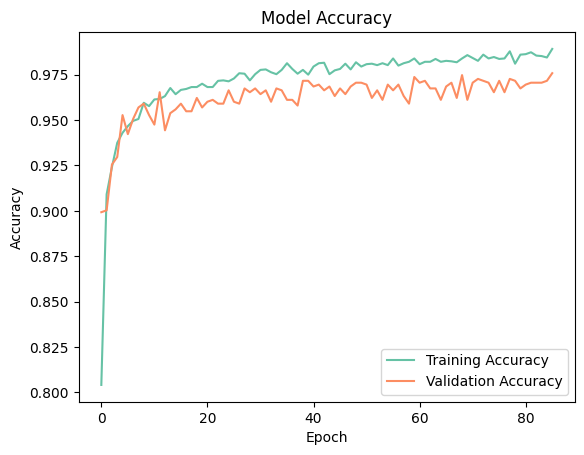

In [82]:
# Plot training and validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# LSTM Model

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

In [84]:
# Create a Sequential model
model = Sequential()
model.add(LSTM(50, input_shape=(10, 1)))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=10, epochs=50, verbose=1)

Epoch 1/50
477/477 [==============================] - 5s 6ms/step - loss: 0.7231 - accuracy: 0.7171
Epoch 2/50
477/477 [==============================] - 3s 6ms/step - loss: 0.5359 - accuracy: 0.7769
Epoch 3/50
477/477 [==============================] - 3s 5ms/step - loss: 0.4316 - accuracy: 0.8301
Epoch 4/50
477/477 [==============================] - 3s 5ms/step - loss: 0.3690 - accuracy: 0.8505
Epoch 5/50
477/477 [==============================] - 2s 5ms/step - loss: 0.3401 - accuracy: 0.8633
Epoch 6/50
477/477 [==============================] - 3s 7ms/step - loss: 0.3143 - accuracy: 0.8778
Epoch 7/50
477/477 [==============================] - 3s 6ms/step - loss: 0.2916 - accuracy: 0.8841
Epoch 8/50
477/477 [==============================] - 3s 5ms/step - loss: 0.2722 - accuracy: 0.8929
Epoch 9/50
477/477 [==============================] - 2s 5ms/step - loss: 0.2574 - accuracy: 0.9028
Epoch 10/50
477/477 [==============================] - 2s 5ms/step - loss: 0.2465 - accuracy: 0.9028

In [85]:
# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {accuracy * 100:.2f}%')

Test accuracy: 95.55%


# GRU Model

In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam

In [87]:
model = Sequential()
model.add(GRU(50, input_shape=(10, 1)))
model.add(Dense(4, activation='softmax'))
# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=10, epochs=50, verbose=1)


Epoch 1/50
477/477 [==============================] - 5s 6ms/step - loss: 0.6689 - accuracy: 0.7320
Epoch 2/50
477/477 [==============================] - 4s 7ms/step - loss: 0.4116 - accuracy: 0.8364
Epoch 3/50
477/477 [==============================] - 3s 6ms/step - loss: 0.3427 - accuracy: 0.8673
Epoch 4/50
477/477 [==============================] - 3s 6ms/step - loss: 0.3057 - accuracy: 0.8830
Epoch 5/50
477/477 [==============================] - 3s 6ms/step - loss: 0.2645 - accuracy: 0.8990
Epoch 6/50
477/477 [==============================] - 3s 7ms/step - loss: 0.2363 - accuracy: 0.9139
Epoch 7/50
477/477 [==============================] - 3s 6ms/step - loss: 0.2103 - accuracy: 0.9196
Epoch 8/50
477/477 [==============================] - 3s 6ms/step - loss: 0.1845 - accuracy: 0.9275
Epoch 9/50
477/477 [==============================] - 3s 6ms/step - loss: 0.1718 - accuracy: 0.9330
Epoch 10/50
477/477 [==============================] - 3s 6ms/step - loss: 0.1537 - accuracy: 0.9397

In [88]:
# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {accuracy * 100:.2f}%')

Test accuracy: 97.31%
